In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from idtxl.bivariate_pid import BivariatePID
from idtxl.data import Data

In [2]:
def bernoulli(n, p):
    return (np.random.uniform(0, 1, n) < p).astype(int)

def gen_discrete_random(nSample, alphaX=0.5, alphaY=0.5, alphaZ=0.5):
    T =   2*bernoulli(nSample, 0.5)
    nuX = 2*bernoulli(nSample, 0.5)
    nuY = 2*bernoulli(nSample, 0.5)
    nuZ = 2*bernoulli(nSample, 0.5)
    aX = bernoulli(nSample, alphaX)
    aY = bernoulli(nSample, alphaY)
    aZ = bernoulli(nSample, alphaZ)
    
    x = (1 - aX)*T + aX*nuX
    y = nuY
    z = (1 - aZ)*T + aZ*nuZ
    return x,y,z

def shuffle(x):
    x1 = x.copy()
    np.random.shuffle(x1)
    return x1

In [3]:
decompLabels = ['unq_s1', 'unq_s2', 'shd_s1_s2', 'syn_s1_s2']

In [4]:
def pid(dataPS):
    settings = {'pid_estimator': 'TartuPID', 'lags_pid': [0, 0]}

    dataIDTxl = Data(dataPS, dim_order='ps', normalise=False)
    pid = BivariatePID()
    rez = pid.analyse_single_target(settings=settings, data=dataIDTxl, target=2, sources=[0, 1])
    rezTrg = rez.get_single_target(2)

    # Getting rid of negative and very low positive PID's.
    # Statistical tests behave unexplectedly - perhaps low values contaminated by roundoff errors?
#     return {k : np.clip(rezTrg[k], 1.0E-6, None) for k in decompLabels}
    return {k : rezTrg[k] for k in decompLabels}

In [5]:
nDataLst = []
rezLst = []
rezSh = []
for nData in (10**np.linspace(3, 5, 1000)).astype(int):
    x,y,z = gen_discrete_random(nData, alphaX=0.1, alphaY=0.1, alphaZ=0.1)
    pidRez = pid(np.array([x,y,z]))
    pidSh = pid(np.array([x,y,shuffle(z)]))
    nDataLst += [nData]
#     nDataLst += [nData, nData]
#     rezLst += [pidRez['unq_s1'], pidRez['unq_s2']]
#     rezSh += [pidSh['unq_s1'], pidSh['unq_s2']]
    rezLst += [pidRez['shd_s1_s2']]
    rezSh += [pidSh['shd_s1_s2']]

Adding data with properties: 3 processes, 1000 samples, 1 replications
overwriting existing data

unq information s1: 0.58021187, s2: -0.00000000
shd information: 0.00023279, syn information: 0.00006828
Adding data with properties: 3 processes, 1000 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00062194
shd information: 0.00064898, syn information: 0.00075866
Adding data with properties: 3 processes, 1004 samples, 1 replications
overwriting existing data

unq information s1: 0.55761855, s2: -0.00000000
shd information: 0.00059575, syn information: 0.00003127
Adding data with properties: 3 processes, 1004 samples, 1 replications
overwriting existing data

unq information s1: 0.00051685, s2: -0.00000000
shd information: 0.00009052, syn information: 0.00074821
Adding data with properties: 3 processes, 1009 samples, 1 replications
overwriting existing data

unq information s1: 0.53879869, s2: -0.00000000
shd information: 0.00383603, syn informati


unq information s1: 0.57649506, s2: -0.00000000
shd information: 0.00109430, syn information: 0.00031752
Adding data with properties: 3 processes, 1153 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00005209
shd information: 0.00001490, syn information: 0.00051128
Adding data with properties: 3 processes, 1158 samples, 1 replications
overwriting existing data

unq information s1: 0.55588786, s2: -0.00000000
shd information: 0.00005238, syn information: 0.00045724
Adding data with properties: 3 processes, 1158 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00106870
shd information: 0.00007810, syn information: 0.00014353
Adding data with properties: 3 processes, 1164 samples, 1 replications
overwriting existing data

unq information s1: 0.53121373, s2: -0.00000000
shd information: 0.00050972, syn information: 0.00075085
Adding data with properties: 3 processes, 1164 samples, 1 replications
overwriting

Adding data with properties: 3 processes, 1330 samples, 1 replications
overwriting existing data

unq information s1: 0.57294149, s2: -0.00000000
shd information: 0.00005873, syn information: 0.00182741
Adding data with properties: 3 processes, 1330 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00063806
shd information: 0.00001458, syn information: 0.00079629
Adding data with properties: 3 processes, 1336 samples, 1 replications
overwriting existing data

unq information s1: 0.57668257, s2: -0.00000000
shd information: 0.00000575, syn information: 0.00251785
Adding data with properties: 3 processes, 1336 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00004450
shd information: 0.00027774, syn information: 0.00104482
Adding data with properties: 3 processes, 1343 samples, 1 replications
overwriting existing data

unq information s1: 0.52424283, s2: -0.00000000
shd information: 0.00012990, syn informati

Adding data with properties: 3 processes, 1528 samples, 1 replications
overwriting existing data

unq information s1: 0.56196124, s2: -0.00000000
shd information: 0.00272170, syn information: 0.00025348
Adding data with properties: 3 processes, 1528 samples, 1 replications
overwriting existing data

unq information s1: 0.00026164, s2: -0.00000000
shd information: 0.00001182, syn information: 0.00247365
Adding data with properties: 3 processes, 1535 samples, 1 replications
overwriting existing data

unq information s1: 0.53218474, s2: -0.00000000
shd information: 0.00034032, syn information: 0.00006274
Adding data with properties: 3 processes, 1535 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00008309
shd information: 0.00037672, syn information: 0.00079791
Adding data with properties: 3 processes, 1542 samples, 1 replications
overwriting existing data

unq information s1: 0.56435575, s2: -0.00000000
shd information: 0.00073677, syn informati


unq information s1: 0.55264813, s2: -0.00000000
shd information: 0.00001601, syn information: 0.00048641
Adding data with properties: 3 processes, 1738 samples, 1 replications
overwriting existing data

unq information s1: 0.00035578, s2: -0.00000000
shd information: 0.00013551, syn information: 0.00057374
Adding data with properties: 3 processes, 1746 samples, 1 replications
overwriting existing data

unq information s1: 0.51927910, s2: -0.00000000
shd information: 0.00013869, syn information: 0.00016759
Adding data with properties: 3 processes, 1746 samples, 1 replications
overwriting existing data

unq information s1: 0.00149019, s2: -0.00000000
shd information: 0.00003293, syn information: 0.00003283
Adding data with properties: 3 processes, 1754 samples, 1 replications
overwriting existing data

unq information s1: 0.54785796, s2: -0.00000000
shd information: 0.00006540, syn information: 0.00165881
Adding data with properties: 3 processes, 1754 samples, 1 replications
overwriting


unq information s1: 0.52660773, s2: -0.00000000
shd information: 0.00011567, syn information: 0.00381477
Adding data with properties: 3 processes, 1933 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00006890
shd information: 0.00000481, syn information: 0.00144810
Adding data with properties: 3 processes, 1942 samples, 1 replications
overwriting existing data

unq information s1: 0.53453023, s2: -0.00000000
shd information: 0.00000054, syn information: 0.00069713
Adding data with properties: 3 processes, 1942 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00102827
shd information: 0.00026923, syn information: 0.00089201
Adding data with properties: 3 processes, 1951 samples, 1 replications
overwriting existing data

unq information s1: 0.54274672, s2: -0.00000000
shd information: 0.00002163, syn information: 0.00011919
Adding data with properties: 3 processes, 1951 samples, 1 replications
overwriting


unq information s1: 0.57463459, s2: -0.00000000
shd information: 0.00051088, syn information: 0.00073046
Adding data with properties: 3 processes, 2149 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00053674
shd information: 0.00000380, syn information: 0.00005077
Adding data with properties: 3 processes, 2159 samples, 1 replications
overwriting existing data

unq information s1: 0.60428791, s2: -0.00000000
shd information: 0.00000006, syn information: 0.00056184
Adding data with properties: 3 processes, 2159 samples, 1 replications
overwriting existing data

unq information s1: 0.00001269, s2: -0.00000000
shd information: 0.00000006, syn information: 0.00021662
Adding data with properties: 3 processes, 2169 samples, 1 replications
overwriting existing data

unq information s1: 0.52805278, s2: -0.00000000
shd information: 0.00023850, syn information: 0.00013688
Adding data with properties: 3 processes, 2169 samples, 1 replications
overwriting

Adding data with properties: 3 processes, 2400 samples, 1 replications
overwriting existing data

unq information s1: 0.51321094, s2: -0.00000000
shd information: 0.00083680, syn information: 0.00096654
Adding data with properties: 3 processes, 2400 samples, 1 replications
overwriting existing data

unq information s1: 0.00008512, s2: -0.00000000
shd information: 0.00005907, syn information: 0.00019376
Adding data with properties: 3 processes, 2412 samples, 1 replications
overwriting existing data

unq information s1: 0.55118242, s2: -0.00000000
shd information: 0.00012704, syn information: 0.00082171
Adding data with properties: 3 processes, 2412 samples, 1 replications
overwriting existing data

unq information s1: 0.00001781, s2: -0.00000000
shd information: 0.00003178, syn information: 0.00005596
Adding data with properties: 3 processes, 2423 samples, 1 replications
overwriting existing data

unq information s1: 0.55510903, s2: -0.00000000
shd information: 0.00061829, syn informati


unq information s1: -0.00000000, s2: 0.00048468
shd information: 0.00005006, syn information: 0.00007200
Adding data with properties: 3 processes, 2657 samples, 1 replications
overwriting existing data

unq information s1: 0.53761650, s2: -0.00000000
shd information: 0.00003759, syn information: 0.00025988
Adding data with properties: 3 processes, 2657 samples, 1 replications
overwriting existing data

unq information s1: 0.00005277, s2: -0.00000000
shd information: 0.00000527, syn information: 0.00004304
Adding data with properties: 3 processes, 2669 samples, 1 replications
overwriting existing data

unq information s1: 0.53804821, s2: -0.00000000
shd information: 0.00002366, syn information: 0.00083291
Adding data with properties: 3 processes, 2669 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00168392
shd information: 0.00000053, syn information: 0.00008548
Adding data with properties: 3 processes, 2681 samples, 1 replications
overwriting


unq information s1: 0.53964001, s2: -0.00000000
shd information: 0.00034141, syn information: 0.00046154
Adding data with properties: 3 processes, 2913 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00014072
shd information: 0.00011991, syn information: 0.00086286
Adding data with properties: 3 processes, 2927 samples, 1 replications
overwriting existing data

unq information s1: 0.53409500, s2: -0.00000000
shd information: 0.00001481, syn information: 0.00000445
Adding data with properties: 3 processes, 2927 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00010072
shd information: 0.00010366, syn information: 0.00069153
Adding data with properties: 3 processes, 2940 samples, 1 replications
overwriting existing data

unq information s1: 0.52759414, s2: 0.00000000
shd information: 0.00014662, syn information: 0.00026240
Adding data with properties: 3 processes, 2940 samples, 1 replications
overwriting 


unq information s1: 0.57607808, s2: -0.00000000
shd information: 0.00120228, syn information: 0.00010133
Adding data with properties: 3 processes, 3455 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00008133
shd information: 0.00000154, syn information: 0.00000081
Adding data with properties: 3 processes, 3471 samples, 1 replications
overwriting existing data

unq information s1: 0.54543611, s2: -0.00000000
shd information: 0.00015384, syn information: 0.00104593
Adding data with properties: 3 processes, 3471 samples, 1 replications
overwriting existing data

unq information s1: 0.00017345, s2: -0.00000000
shd information: 0.00001064, syn information: 0.00020644
Adding data with properties: 3 processes, 3487 samples, 1 replications
overwriting existing data

unq information s1: 0.53339018, s2: -0.00000000
shd information: 0.00004005, syn information: 0.00139380
Adding data with properties: 3 processes, 3487 samples, 1 replications
overwriting


unq information s1: 0.55690593, s2: -0.00000000
shd information: 0.00015529, syn information: 0.00040016
Adding data with properties: 3 processes, 4023 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000966
shd information: 0.00002777, syn information: 0.00003493
Adding data with properties: 3 processes, 4042 samples, 1 replications
overwriting existing data

unq information s1: 0.53193983, s2: -0.00000000
shd information: 0.00000638, syn information: 0.00091063
Adding data with properties: 3 processes, 4042 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00002540
shd information: 0.00000000, syn information: 0.00003978
Adding data with properties: 3 processes, 4060 samples, 1 replications
overwriting existing data

unq information s1: 0.55515537, s2: -0.00000000
shd information: 0.00002173, syn information: 0.00049734
Adding data with properties: 3 processes, 4060 samples, 1 replications
overwriting


unq information s1: -0.00000000, s2: 0.00001367
shd information: 0.00000028, syn information: 0.00028136
Adding data with properties: 3 processes, 4598 samples, 1 replications
overwriting existing data

unq information s1: 0.54604525, s2: -0.00000000
shd information: 0.00002652, syn information: 0.00028209
Adding data with properties: 3 processes, 4598 samples, 1 replications
overwriting existing data

unq information s1: 0.00034365, s2: -0.00000000
shd information: 0.00026538, syn information: 0.00035361
Adding data with properties: 3 processes, 4620 samples, 1 replications
overwriting existing data

unq information s1: 0.55135680, s2: -0.00000000
shd information: 0.00004922, syn information: 0.00013404
Adding data with properties: 3 processes, 4620 samples, 1 replications
overwriting existing data

unq information s1: 0.00005238, s2: -0.00000000
shd information: 0.00000116, syn information: 0.00017007
Adding data with properties: 3 processes, 4641 samples, 1 replications
overwriting


unq information s1: 0.00000268, s2: -0.00000000
shd information: 0.00000656, syn information: 0.00001524
Adding data with properties: 3 processes, 5184 samples, 1 replications
overwriting existing data

unq information s1: 0.57886674, s2: -0.00000000
shd information: 0.00001570, syn information: 0.00000382
Adding data with properties: 3 processes, 5184 samples, 1 replications
overwriting existing data

unq information s1: 0.00021503, s2: -0.00000000
shd information: 0.00002133, syn information: 0.00016719
Adding data with properties: 3 processes, 5208 samples, 1 replications
overwriting existing data

unq information s1: 0.54873828, s2: -0.00000000
shd information: 0.00000653, syn information: 0.00044687
Adding data with properties: 3 processes, 5208 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00037906
shd information: 0.00000185, syn information: 0.00010031
Adding data with properties: 3 processes, 5232 samples, 1 replications
overwriting


unq information s1: 0.00011926, s2: -0.00000000
shd information: 0.00000176, syn information: 0.00003690
Adding data with properties: 3 processes, 5844 samples, 1 replications
overwriting existing data

unq information s1: 0.54429246, s2: -0.00000000
shd information: 0.00013412, syn information: 0.00065196
Adding data with properties: 3 processes, 5844 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00019483
shd information: 0.00000134, syn information: 0.00000138
Adding data with properties: 3 processes, 5871 samples, 1 replications
overwriting existing data

unq information s1: 0.56446840, s2: -0.00000000
shd information: 0.00008225, syn information: 0.00001346
Adding data with properties: 3 processes, 5871 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00019211
shd information: 0.00000617, syn information: 0.00014307
Adding data with properties: 3 processes, 5898 samples, 1 replications
overwriting


unq information s1: 0.57479928, s2: -0.00000000
shd information: 0.00009868, syn information: 0.00021903
Adding data with properties: 3 processes, 6468 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00004905
shd information: 0.00000577, syn information: 0.00003787
Adding data with properties: 3 processes, 6498 samples, 1 replications
overwriting existing data

unq information s1: 0.52316552, s2: -0.00000000
shd information: 0.00000304, syn information: 0.00055966
Adding data with properties: 3 processes, 6498 samples, 1 replications
overwriting existing data

unq information s1: 0.00055153, s2: -0.00000000
shd information: 0.00022472, syn information: 0.00029319
Adding data with properties: 3 processes, 6528 samples, 1 replications
overwriting existing data

unq information s1: 0.56627628, s2: -0.00000000
shd information: 0.00005824, syn information: 0.00003147
Adding data with properties: 3 processes, 6528 samples, 1 replications
overwriting


unq information s1: 0.53226604, s2: -0.00000000
shd information: 0.00000713, syn information: 0.00013980
Adding data with properties: 3 processes, 7159 samples, 1 replications
overwriting existing data

unq information s1: 0.00004030, s2: -0.00000000
shd information: 0.00000296, syn information: 0.00000383
Adding data with properties: 3 processes, 7192 samples, 1 replications
overwriting existing data

unq information s1: 0.55490443, s2: -0.00000000
shd information: 0.00000466, syn information: 0.00002161
Adding data with properties: 3 processes, 7192 samples, 1 replications
overwriting existing data

unq information s1: 0.00018306, s2: -0.00000000
shd information: 0.00006029, syn information: 0.00022312
Adding data with properties: 3 processes, 7225 samples, 1 replications
overwriting existing data

unq information s1: 0.56823238, s2: -0.00000000
shd information: 0.00003777, syn information: 0.00021159
Adding data with properties: 3 processes, 7225 samples, 1 replications
overwriting


unq information s1: -0.00000000, s2: 0.00006153
shd information: 0.00000164, syn information: 0.00021382
Adding data with properties: 3 processes, 8183 samples, 1 replications
overwriting existing data

unq information s1: 0.53196361, s2: -0.00000000
shd information: 0.00045631, syn information: 0.00011333
Adding data with properties: 3 processes, 8183 samples, 1 replications
overwriting existing data

unq information s1: 0.00012630, s2: -0.00000000
shd information: 0.00001880, syn information: 0.00008856
Adding data with properties: 3 processes, 8220 samples, 1 replications
overwriting existing data

unq information s1: 0.55419659, s2: -0.00000000
shd information: 0.00000041, syn information: 0.00001378
Adding data with properties: 3 processes, 8220 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00005132
shd information: 0.00000747, syn information: 0.00011681
Adding data with properties: 3 processes, 8258 samples, 1 replications
overwriting


unq information s1: 0.00057811, s2: -0.00000000
shd information: 0.00018612, syn information: 0.00020377
Adding data with properties: 3 processes, 9224 samples, 1 replications
overwriting existing data

unq information s1: 0.54288056, s2: -0.00000000
shd information: 0.00003915, syn information: 0.00017260
Adding data with properties: 3 processes, 9224 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000440
shd information: 0.00000051, syn information: 0.00000726
Adding data with properties: 3 processes, 9267 samples, 1 replications
overwriting existing data

unq information s1: 0.53020754, s2: -0.00000000
shd information: 0.00000044, syn information: 0.00025550
Adding data with properties: 3 processes, 9267 samples, 1 replications
overwriting existing data

unq information s1: 0.00014345, s2: -0.00000000
shd information: 0.00000105, syn information: 0.00001237
Adding data with properties: 3 processes, 9310 samples, 1 replications
overwriting


unq information s1: 0.00006378, s2: -0.00000000
shd information: 0.00008141, syn information: 0.00017227
Adding data with properties: 3 processes, 10351 samples, 1 replications
overwriting existing data

unq information s1: 0.55222646, s2: -0.00000000
shd information: 0.00001021, syn information: 0.00008136
Adding data with properties: 3 processes, 10351 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00002367
shd information: 0.00006859, syn information: 0.00018948
Adding data with properties: 3 processes, 10399 samples, 1 replications
overwriting existing data

unq information s1: 0.55782125, s2: -0.00000000
shd information: 0.00006073, syn information: 0.00006529
Adding data with properties: 3 processes, 10399 samples, 1 replications
overwriting existing data

unq information s1: 0.00009028, s2: -0.00000000
shd information: 0.00004641, syn information: 0.00005069
Adding data with properties: 3 processes, 10447 samples, 1 replications
overwr


unq information s1: 0.54933910, s2: -0.00000000
shd information: 0.00010116, syn information: 0.00010747
Adding data with properties: 3 processes, 11403 samples, 1 replications
overwriting existing data

unq information s1: 0.00002870, s2: -0.00000000
shd information: 0.00000603, syn information: 0.00025619
Adding data with properties: 3 processes, 11456 samples, 1 replications
overwriting existing data

unq information s1: 0.53980058, s2: -0.00000000
shd information: 0.00001846, syn information: 0.00045959
Adding data with properties: 3 processes, 11456 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00033466
shd information: 0.00004255, syn information: 0.00005048
Adding data with properties: 3 processes, 11509 samples, 1 replications
overwriting existing data

unq information s1: 0.53843144, s2: -0.00000000
shd information: 0.00000453, syn information: 0.00027846
Adding data with properties: 3 processes, 11509 samples, 1 replications
overwr


unq information s1: 0.55629703, s2: -0.00000000
shd information: 0.00004186, syn information: 0.00031794
Adding data with properties: 3 processes, 12856 samples, 1 replications
overwriting existing data

unq information s1: 0.00000975, s2: -0.00000000
shd information: 0.00007829, syn information: 0.00011459
Adding data with properties: 3 processes, 12915 samples, 1 replications
overwriting existing data

unq information s1: 0.53792292, s2: -0.00000000
shd information: 0.00000253, syn information: 0.00000379
Adding data with properties: 3 processes, 12915 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00008681
shd information: 0.00001291, syn information: 0.00003762
Adding data with properties: 3 processes, 12975 samples, 1 replications
overwriting existing data

unq information s1: 0.55276254, s2: -0.00000000
shd information: 0.00000053, syn information: 0.00002277
Adding data with properties: 3 processes, 12975 samples, 1 replications
overwr


unq information s1: -0.00000000, s2: 0.00001073
shd information: 0.00001707, syn information: 0.00002158
Adding data with properties: 3 processes, 14426 samples, 1 replications
overwriting existing data

unq information s1: 0.55071242, s2: -0.00000000
shd information: 0.00002199, syn information: 0.00002880
Adding data with properties: 3 processes, 14426 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00002843
shd information: 0.00000377, syn information: 0.00001315
Adding data with properties: 3 processes, 14493 samples, 1 replications
overwriting existing data

unq information s1: 0.54119756, s2: -0.00000000
shd information: 0.00000754, syn information: 0.00002386
Adding data with properties: 3 processes, 14493 samples, 1 replications
overwriting existing data

unq information s1: 0.00000639, s2: -0.00000000
shd information: 0.00000248, syn information: 0.00010566
Adding data with properties: 3 processes, 14560 samples, 1 replications
overwr


unq information s1: 0.55145449, s2: -0.00000000
shd information: 0.00001239, syn information: 0.00005175
Adding data with properties: 3 processes, 15966 samples, 1 replications
overwriting existing data

unq information s1: 0.00001344, s2: -0.00000000
shd information: 0.00002102, syn information: 0.00002757
Adding data with properties: 3 processes, 16040 samples, 1 replications
overwriting existing data

unq information s1: 0.55109464, s2: -0.00000000
shd information: 0.00000041, syn information: 0.00005047
Adding data with properties: 3 processes, 16040 samples, 1 replications
overwriting existing data

unq information s1: 0.00003355, s2: -0.00000000
shd information: 0.00000162, syn information: 0.00001934
Adding data with properties: 3 processes, 16114 samples, 1 replications
overwriting existing data

unq information s1: 0.54732470, s2: -0.00000000
shd information: 0.00000332, syn information: 0.00015829
Adding data with properties: 3 processes, 16114 samples, 1 replications
overwr


unq information s1: -0.00000000, s2: 0.00001179
shd information: 0.00000100, syn information: 0.00002631
Adding data with properties: 3 processes, 17589 samples, 1 replications
overwriting existing data

unq information s1: 0.55047621, s2: -0.00000000
shd information: 0.00004391, syn information: 0.00010588
Adding data with properties: 3 processes, 17589 samples, 1 replications
overwriting existing data

unq information s1: 0.00002202, s2: -0.00000000
shd information: 0.00014486, syn information: 0.00017370
Adding data with properties: 3 processes, 17670 samples, 1 replications
overwriting existing data

unq information s1: 0.54118336, s2: -0.00000000
shd information: 0.00015228, syn information: 0.00004147
Adding data with properties: 3 processes, 17670 samples, 1 replications
overwriting existing data

unq information s1: 0.00000028, s2: 0.00000054
shd information: 0.00003775, syn information: 0.00006605
Adding data with properties: 3 processes, 17752 samples, 1 replications
overwri


unq information s1: 0.54552720, s2: -0.00000000
shd information: 0.00000028, syn information: 0.00000309
Adding data with properties: 3 processes, 19556 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001620
shd information: 0.00003204, syn information: 0.00003189
Adding data with properties: 3 processes, 19646 samples, 1 replications
overwriting existing data

unq information s1: 0.54716788, s2: -0.00000000
shd information: 0.00006549, syn information: 0.00009425
Adding data with properties: 3 processes, 19646 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000750
shd information: 0.00000804, syn information: 0.00002587
Adding data with properties: 3 processes, 19737 samples, 1 replications
overwriting existing data

unq information s1: 0.55224994, s2: -0.00000000
shd information: 0.00001345, syn information: 0.00018845
Adding data with properties: 3 processes, 19737 samples, 1 replications
overwr


unq information s1: 0.54586526, s2: -0.00000000
shd information: 0.00001751, syn information: 0.00008673
Adding data with properties: 3 processes, 21743 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00004978
shd information: 0.00002617, syn information: 0.00010788
Adding data with properties: 3 processes, 21844 samples, 1 replications
overwriting existing data

unq information s1: 0.54938331, s2: -0.00000000
shd information: 0.00023361, syn information: 0.00003254
Adding data with properties: 3 processes, 21844 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00006313
shd information: 0.00002184, syn information: 0.00005561
Adding data with properties: 3 processes, 21945 samples, 1 replications
overwriting existing data

unq information s1: 0.54523716, s2: -0.00000000
shd information: 0.00002328, syn information: 0.00001215
Adding data with properties: 3 processes, 21945 samples, 1 replications
overwr


unq information s1: -0.00000000, s2: 0.00016787
shd information: 0.00000209, syn information: 0.00000256
Adding data with properties: 3 processes, 24287 samples, 1 replications
overwriting existing data

unq information s1: 0.55210301, s2: -0.00000000
shd information: 0.00006746, syn information: 0.00004769
Adding data with properties: 3 processes, 24287 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000880
shd information: 0.00000043, syn information: 0.00005123
Adding data with properties: 3 processes, 24399 samples, 1 replications
overwriting existing data

unq information s1: 0.55297075, s2: -0.00000000
shd information: 0.00002879, syn information: 0.00000951
Adding data with properties: 3 processes, 24399 samples, 1 replications
overwriting existing data

unq information s1: 0.00002007, s2: -0.00000000
shd information: 0.00000039, syn information: 0.00006398
Adding data with properties: 3 processes, 24512 samples, 1 replications
overwr


unq information s1: 0.00000172, s2: -0.00000000
shd information: 0.00000067, syn information: 0.00004076
Adding data with properties: 3 processes, 26756 samples, 1 replications
overwriting existing data

unq information s1: 0.54604226, s2: -0.00000000
shd information: 0.00012237, syn information: 0.00000040
Adding data with properties: 3 processes, 26756 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000529
shd information: 0.00000124, syn information: 0.00000762
Adding data with properties: 3 processes, 26880 samples, 1 replications
overwriting existing data

unq information s1: 0.54625748, s2: -0.00000000
shd information: 0.00001406, syn information: 0.00000792
Adding data with properties: 3 processes, 26880 samples, 1 replications
overwriting existing data

unq information s1: 0.00005108, s2: -0.00000000
shd information: 0.00000051, syn information: 0.00000072
Adding data with properties: 3 processes, 27004 samples, 1 replications
overwr


unq information s1: 0.54131141, s2: -0.00000000
shd information: 0.00000150, syn information: 0.00003380
Adding data with properties: 3 processes, 29749 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001064
shd information: 0.00000247, syn information: 0.00001319
Adding data with properties: 3 processes, 29886 samples, 1 replications
overwriting existing data

unq information s1: 0.54301840, s2: -0.00000000
shd information: 0.00000551, syn information: 0.00000982
Adding data with properties: 3 processes, 29886 samples, 1 replications
overwriting existing data

unq information s1: 0.00001082, s2: -0.00000000
shd information: 0.00000009, syn information: 0.00002132
Adding data with properties: 3 processes, 30024 samples, 1 replications
overwriting existing data

unq information s1: 0.55491369, s2: -0.00000000
shd information: 0.00000470, syn information: 0.00001433
Adding data with properties: 3 processes, 30024 samples, 1 replications
overwr


unq information s1: 0.00001049, s2: -0.00000000
shd information: 0.00002600, syn information: 0.00003012
Adding data with properties: 3 processes, 32772 samples, 1 replications
overwriting existing data

unq information s1: 0.54908216, s2: -0.00000000
shd information: 0.00000259, syn information: 0.00000486
Adding data with properties: 3 processes, 32772 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00012898
shd information: 0.00001941, syn information: 0.00007795
Adding data with properties: 3 processes, 32924 samples, 1 replications
overwriting existing data

unq information s1: 0.55150457, s2: -0.00000000
shd information: 0.00000039, syn information: 0.00002467
Adding data with properties: 3 processes, 32924 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001896
shd information: 0.00000166, syn information: 0.00000839
Adding data with properties: 3 processes, 33076 samples, 1 replications
overwr


unq information s1: 0.55214910, s2: -0.00000000
shd information: 0.00018645, syn information: 0.00015672
Adding data with properties: 3 processes, 35938 samples, 1 replications
overwriting existing data

unq information s1: 0.00003006, s2: -0.00000000
shd information: 0.00001686, syn information: 0.00002192
Adding data with properties: 3 processes, 36104 samples, 1 replications
overwriting existing data

unq information s1: 0.54623266, s2: -0.00000000
shd information: 0.00000751, syn information: 0.00001485
Adding data with properties: 3 processes, 36104 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000213
shd information: 0.00000138, syn information: 0.00000607
Adding data with properties: 3 processes, 36271 samples, 1 replications
overwriting existing data

unq information s1: 0.55129073, s2: -0.00000000
shd information: 0.00003094, syn information: 0.00004638
Adding data with properties: 3 processes, 36271 samples, 1 replications
overwr


unq information s1: 0.00001661, s2: -0.00000000
shd information: 0.00000003, syn information: 0.00000790
Adding data with properties: 3 processes, 39957 samples, 1 replications
overwriting existing data

unq information s1: 0.54509498, s2: -0.00000000
shd information: 0.00000228, syn information: 0.00007981
Adding data with properties: 3 processes, 39957 samples, 1 replications
overwriting existing data

unq information s1: 0.00000264, s2: -0.00000000
shd information: 0.00001546, syn information: 0.00002883
Adding data with properties: 3 processes, 40142 samples, 1 replications
overwriting existing data

unq information s1: 0.54901527, s2: -0.00000000
shd information: 0.00002673, syn information: 0.00000729
Adding data with properties: 3 processes, 40142 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00004766
shd information: 0.00000041, syn information: 0.00001101
Adding data with properties: 3 processes, 40327 samples, 1 replications
overwr


unq information s1: 0.54621450, s2: -0.00000000
shd information: 0.00000040, syn information: 0.00002587
Adding data with properties: 3 processes, 44222 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00005516
shd information: 0.00000180, syn information: 0.00007283
Adding data with properties: 3 processes, 44427 samples, 1 replications
overwriting existing data

unq information s1: 0.55312256, s2: -0.00000000
shd information: 0.00000605, syn information: 0.00002456
Adding data with properties: 3 processes, 44427 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000928
shd information: 0.00000832, syn information: 0.00000833
Adding data with properties: 3 processes, 44632 samples, 1 replications
overwriting existing data

unq information s1: 0.54557171, s2: -0.00000000
shd information: 0.00002023, syn information: 0.00000629
Adding data with properties: 3 processes, 44632 samples, 1 replications
overwr


unq information s1: -0.00000000, s2: 0.00001110
shd information: 0.00000048, syn information: 0.00000061
Adding data with properties: 3 processes, 48717 samples, 1 replications
overwriting existing data

unq information s1: 0.55232823, s2: -0.00000000
shd information: 0.00000001, syn information: 0.00000799
Adding data with properties: 3 processes, 48717 samples, 1 replications
overwriting existing data

unq information s1: 0.00004723, s2: -0.00000000
shd information: 0.00001062, syn information: 0.00001280
Adding data with properties: 3 processes, 48942 samples, 1 replications
overwriting existing data

unq information s1: 0.55444104, s2: -0.00000000
shd information: 0.00000053, syn information: 0.00006855
Adding data with properties: 3 processes, 48942 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00003030
shd information: 0.00000174, syn information: 0.00000236
Adding data with properties: 3 processes, 49169 samples, 1 replications
overwr


unq information s1: -0.00000000, s2: 0.00000392
shd information: 0.00000900, syn information: 0.00002476
Adding data with properties: 3 processes, 53917 samples, 1 replications
overwriting existing data

unq information s1: 0.54403956, s2: -0.00000000
shd information: 0.00000506, syn information: 0.00002471
Adding data with properties: 3 processes, 53917 samples, 1 replications
overwriting existing data

unq information s1: 0.00002139, s2: -0.00000000
shd information: 0.00000866, syn information: 0.00001586
Adding data with properties: 3 processes, 54166 samples, 1 replications
overwriting existing data

unq information s1: 0.55169933, s2: -0.00000000
shd information: 0.00003593, syn information: 0.00001670
Adding data with properties: 3 processes, 54166 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001118
shd information: 0.00000006, syn information: 0.00000316
Adding data with properties: 3 processes, 54417 samples, 1 replications
overwr


unq information s1: 0.00000200, s2: -0.00000000
shd information: 0.00000055, syn information: 0.00000322
Adding data with properties: 3 processes, 59672 samples, 1 replications
overwriting existing data

unq information s1: 0.55216995, s2: -0.00000000
shd information: 0.00000918, syn information: 0.00005872
Adding data with properties: 3 processes, 59672 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000649
shd information: 0.00000169, syn information: 0.00003844
Adding data with properties: 3 processes, 59948 samples, 1 replications
overwriting existing data

unq information s1: 0.54280965, s2: -0.00000000
shd information: 0.00008211, syn information: 0.00012947
Adding data with properties: 3 processes, 59948 samples, 1 replications
overwriting existing data

unq information s1: 0.00000451, s2: -0.00000000
shd information: 0.00001086, syn information: 0.00001530
Adding data with properties: 3 processes, 60225 samples, 1 replications
overwr


unq information s1: 0.54720603, s2: -0.00000000
shd information: 0.00000406, syn information: 0.00001286
Adding data with properties: 3 processes, 65738 samples, 1 replications
overwriting existing data

unq information s1: 0.00000086, s2: -0.00000000
shd information: 0.00000310, syn information: 0.00001472
Adding data with properties: 3 processes, 66041 samples, 1 replications
overwriting existing data

unq information s1: 0.54434174, s2: -0.00000000
shd information: 0.00000313, syn information: 0.00002415
Adding data with properties: 3 processes, 66041 samples, 1 replications
overwriting existing data

unq information s1: 0.00000080, s2: -0.00000000
shd information: 0.00000185, syn information: 0.00001023
Adding data with properties: 3 processes, 66347 samples, 1 replications
overwriting existing data

unq information s1: 0.54934599, s2: -0.00000000
shd information: 0.00001564, syn information: 0.00002661
Adding data with properties: 3 processes, 66347 samples, 1 replications
overwr


unq information s1: 0.53988535, s2: -0.00000000
shd information: 0.00000334, syn information: 0.00005714
Adding data with properties: 3 processes, 72420 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000653
shd information: 0.00000936, syn information: 0.00003939
Adding data with properties: 3 processes, 72754 samples, 1 replications
overwriting existing data

unq information s1: 0.53843302, s2: -0.00000000
shd information: 0.00000094, syn information: 0.00008798
Adding data with properties: 3 processes, 72754 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00002071
shd information: 0.00000121, syn information: 0.00000968
Adding data with properties: 3 processes, 73090 samples, 1 replications
overwriting existing data

unq information s1: 0.54677669, s2: -0.00000000
shd information: 0.00000119, syn information: 0.00003710
Adding data with properties: 3 processes, 73090 samples, 1 replications
overwr


unq information s1: 0.54729227, s2: -0.00000000
shd information: 0.00001805, syn information: 0.00000209
Adding data with properties: 3 processes, 79781 samples, 1 replications
overwriting existing data

unq information s1: 0.00000037, s2: -0.00000000
shd information: 0.00000506, syn information: 0.00003217
Adding data with properties: 3 processes, 80150 samples, 1 replications
overwriting existing data

unq information s1: 0.54677197, s2: -0.00000000
shd information: 0.00001097, syn information: 0.00002561
Adding data with properties: 3 processes, 80150 samples, 1 replications
overwriting existing data

unq information s1: 0.00000181, s2: -0.00000000
shd information: 0.00001242, syn information: 0.00001520
Adding data with properties: 3 processes, 80520 samples, 1 replications
overwriting existing data

unq information s1: 0.54789260, s2: -0.00000000
shd information: 0.00000105, syn information: 0.00000802
Adding data with properties: 3 processes, 80520 samples, 1 replications
overwr


unq information s1: 0.00000122, s2: -0.00000000
shd information: 0.00000005, syn information: 0.00000956
Adding data with properties: 3 processes, 87890 samples, 1 replications
overwriting existing data

unq information s1: 0.54521427, s2: -0.00000000
shd information: 0.00002262, syn information: 0.00000006
Adding data with properties: 3 processes, 87890 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00001322
shd information: 0.00000025, syn information: 0.00000036
Adding data with properties: 3 processes, 88296 samples, 1 replications
overwriting existing data

unq information s1: 0.54338045, s2: -0.00000000
shd information: 0.00001664, syn information: 0.00000762
Adding data with properties: 3 processes, 88296 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000696
shd information: 0.00000182, syn information: 0.00000323
Adding data with properties: 3 processes, 88704 samples, 1 replications
overwr


unq information s1: 0.00000104, s2: -0.00000000
shd information: 0.00000000, syn information: 0.00000001
Adding data with properties: 3 processes, 96824 samples, 1 replications
overwriting existing data

unq information s1: 0.54474744, s2: -0.00000000
shd information: 0.00000448, syn information: 0.00001062
Adding data with properties: 3 processes, 96824 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00002984
shd information: 0.00000002, syn information: 0.00000125
Adding data with properties: 3 processes, 97272 samples, 1 replications
overwriting existing data

unq information s1: 0.54804804, s2: -0.00000000
shd information: 0.00000185, syn information: 0.00001414
Adding data with properties: 3 processes, 97272 samples, 1 replications
overwriting existing data

unq information s1: -0.00000000, s2: 0.00000064
shd information: 0.00000096, syn information: 0.00000870
Adding data with properties: 3 processes, 97721 samples, 1 replications
overwr

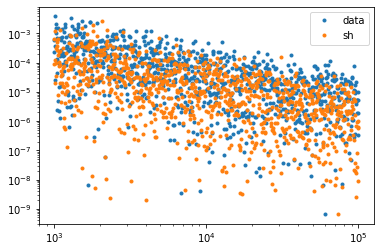

In [6]:
plt.figure()
plt.loglog(nDataLst, rezLst, '.', label='data')
plt.loglog(nDataLst, rezSh, '.', label='sh')
plt.legend()
plt.show()